In [1]:
## Q1
# Import data
from pymatgen.ext.matproj import MPRester
from pprint import pprint

mpr = MPRester("E9ULqed5nCgGQb6w")
data = mpr.query(criteria = "**O3", properties = ["task_id", "pretty_formula", "nsites", "band_gap", "formation_energy_per_atom"
                                                  , "icsd_ids", "e_above_hull"])
# Show first 5 rows
pprint(data[:5])

C:\Users\YoYo\miniconda3\envs\nano281\lib\site-packages\pymatgen\core\periodic_table.py:209: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
C:\Users\YoYo\miniconda3\envs\nano281\lib\site-packages\pymatgen\core\periodic_table.py:209: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
C:\Users\YoYo\miniconda3\envs\nano281\lib\site-packages\pymatgen\core\periodic_table.py:209: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
C:\Users\YoYo\miniconda3\envs\nano281\lib\site-packages\pymatgen\core\periodic_table.py:209: UserWarning: No electronegativity for Rf. Setting to NaN. This has no physical meaning, and is

  0%|          | 0/2509 [00:00<?, ?it/s]

[{'band_gap': 0.0,
  'e_above_hull': 0.052147251499999214,
  'formation_energy_per_atom': -2.1763743310000003,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'CaFeO3',
  'task_id': 'mp-1001571'},
 {'band_gap': 1.0186000000000002,
  'e_above_hull': 0.5612682650000034,
  'formation_energy_per_atom': -2.8427465649999997,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'BaSiO3',
  'task_id': 'mp-1016821'},
 {'band_gap': 0.0,
  'e_above_hull': 0.23236340949999956,
  'formation_energy_per_atom': -2.4636386240000006,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'BaGeO3',
  'task_id': 'mp-1016823'},
 {'band_gap': 0.0,
  'e_above_hull': 0.4631984150000008,
  'formation_energy_per_atom': -0.8392226669999999,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'CdIrO3',
  'task_id': 'mp-1016828'},
 {'band_gap': 0.0,
  'e_above_hull': 0.257332476000002,
  'formation_energy_per_atom': -1.8357238210000006,
  'icsd_ids': [],
  'nsites': 5,
  'pretty_formula': 'CaRhO3',
  'task_id'

In [2]:
## Q1.1
# Turn into pandas dataframe
import pandas as pd
import numpy as np
df = pd.DataFrame(data)
display(df)

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull
0,mp-1001571,CaFeO3,5,0.0000,-2.176374,[],0.052147
1,mp-1016821,BaSiO3,5,1.0186,-2.842747,[],0.561268
2,mp-1016823,BaGeO3,5,0.0000,-2.463639,[],0.232363
3,mp-1016828,CdIrO3,5,0.0000,-0.839223,[],0.463198
4,mp-1016833,CaRhO3,5,0.0000,-1.835724,[],0.257332
...,...,...,...,...,...,...,...
2504,mp-1183045,ZrTiO3,5,0.0000,-2.729425,[],0.721928
2505,mp-20337,ZrPbO3,5,3.2477,-2.843258,[39607],0.032542
2506,mp-542903,ZrPbO3,40,2.7752,-2.850314,"[59405, 150699, 59400, 160460, 162380, 59399, ...",0.025487
2507,mp-647557,ZrPbO3,40,2.8612,-2.845772,[31154],0.030029


In [3]:
## Q1.2
# Count number of total rows in each column
df.count()

task_id                      2509
pretty_formula               2509
nsites                       2509
band_gap                     2509
formation_energy_per_atom    2509
icsd_ids                     2509
e_above_hull                 2508
dtype: int64

In [4]:
# Number of compounds is from task id
n_compounds = df['task_id'].count()
print('There is', n_compounds, 'compounds in MP')

There is 2509 compounds in MP


In [5]:
# Count number of unique formulas
df.pretty_formula.unique()
n_unique_formu = len(pd.unique(df['pretty_formula']))
print('There is', n_unique_formu, 'unique formulas in MP')

# Or can count by this method
df['pretty_formula'].value_counts()

There is 1326 unique formulas in MP


MgSiO3    37
LaMnO3    20
NaNbO3    19
FeBiO3    16
CaCO3     15
          ..
LuGeO3     1
LuReO3     1
MgZnO3     1
MgTlO3     1
ZrTiO3     1
Name: pretty_formula, Length: 1326, dtype: int64

In [6]:
# Average number of crystals is equal to Number of compounds divide Number of unique formulas

n = 2509/1326
print("There is", n, "polymorphous")

There is 1.892156862745098 polymorphous


In [7]:
## Q1.3
# Count number of rows with ICSD
# Method 1
print(df[df['icsd_ids'].str.len() != 0])

# Method 2
df[df['icsd_ids'].map(lambda d: len(d)) > 0]

# Both shows 901 rows with ICSD

         task_id pretty_formula  nsites  band_gap  formation_energy_per_atom  \
19    mp-1017465          BaVO3       5    0.0000                  -2.790474   
20    mp-1017467         CaMnO3       5    0.0000                  -2.418963   
22    mp-1019544         BaZrO3      10    3.1177                  -3.638994   
23    mp-1019598         CeGaO3      20    0.0000                  -2.996931   
26    mp-1076932         BaTiO3       5    0.0000                  -2.513222   
...          ...            ...     ...       ...                        ...   
2437     mp-9812          ZnCO3      10    3.5931                  -1.822855   
2439     mp-9890         TaAgO3      10    1.9511                  -2.409595   
2505    mp-20337         ZrPbO3       5    3.2477                  -2.843258   
2506   mp-542903         ZrPbO3      40    2.7752                  -2.850314   
2507   mp-647557         ZrPbO3      40    2.8612                  -2.845772   

                                       

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull
19,mp-1017465,BaVO3,5,0.0000,-2.790474,[191203],0.114916
20,mp-1017467,CaMnO3,5,0.0000,-2.418963,"[168902, 168903, 181782, 168905]",0.116549
22,mp-1019544,BaZrO3,10,3.1177,-3.638994,[190881],0.000173
23,mp-1019598,CeGaO3,20,0.0000,-2.996931,[183679],0.118626
26,mp-1076932,BaTiO3,5,0.0000,-2.513222,[161419],0.979015
...,...,...,...,...,...,...,...
2437,mp-9812,ZnCO3,10,3.5931,-1.822855,[100679],0.000000
2439,mp-9890,TaAgO3,10,1.9511,-2.409595,[40831],0.022072
2505,mp-20337,ZrPbO3,5,3.2477,-2.843258,[39607],0.032542
2506,mp-542903,ZrPbO3,40,2.7752,-2.850314,"[59405, 150699, 59400, 160460, 162380, 59399, ...",0.025487


In [8]:
frac_icsd = 901/2509
print('Fraction of compounds with at least one ICSD id is', frac_icsd)

Fraction of compounds with at least one ICSD id is 0.3591072140294938


In [9]:
## Q1.4
# Add new column at the end
# eV/atom to J/mol is by multuiply 96500
df['formation_energy (J/mol)'] = df['formation_energy_per_atom'] * 96500
print(df['formation_energy (J/mol)'])

# Show first 5 rows
display(df[0:5])

0      -210020.122942
1      -274325.043522
2      -237741.127216
3       -80984.987365
4      -177147.348727
            ...      
2504   -263389.464990
2505   -274374.423923
2506   -275055.263172
2507   -274617.009990
2508   -274177.160023
Name: formation_energy (J/mol), Length: 2509, dtype: float64


,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,formation_energy (J/mol)
0,mp-1001571,CaFeO3,5,0.0000,-2.176374,[],0.052147,-210020.122942
1,mp-1016821,BaSiO3,5,1.0186,-2.842747,[],0.561268,-274325.043522
2,mp-1016823,BaGeO3,5,0.0000,-2.463639,[],0.232363,-237741.127216
3,mp-1016828,CdIrO3,5,0.0000,-0.839223,[],0.463198,-80984.987365
4,mp-1016833,CaRhO3,5,0.0000,-1.835724,[],0.257332,-177147.348727


In [10]:
## Q1.5
# Categorize energy above hull, and add a new column of lable at the end
df['e_cat'] = np.where(df['e_above_hull']>=0.03, 'unstable', 'potentially stable')
# There is one NaN in this column, keep it as NaN
df['e_cat'].mask(df['e_above_hull'].isna(),np.nan,inplace=True)
df

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,formation_energy (J/mol),e_cat
0,mp-1001571,CaFeO3,5,0.0000,-2.176374,[],0.052147,-210020.122942,unstable
1,mp-1016821,BaSiO3,5,1.0186,-2.842747,[],0.561268,-274325.043522,unstable
2,mp-1016823,BaGeO3,5,0.0000,-2.463639,[],0.232363,-237741.127216,unstable
3,mp-1016828,CdIrO3,5,0.0000,-0.839223,[],0.463198,-80984.987365,unstable
4,mp-1016833,CaRhO3,5,0.0000,-1.835724,[],0.257332,-177147.348727,unstable
...,...,...,...,...,...,...,...,...,...
2504,mp-1183045,ZrTiO3,5,0.0000,-2.729425,[],0.721928,-263389.464990,unstable
2505,mp-20337,ZrPbO3,5,3.2477,-2.843258,[39607],0.032542,-274374.423923,unstable
2506,mp-542903,ZrPbO3,40,2.7752,-2.850314,"[59405, 150699, 59400, 160460, 162380, 59399, ...",0.025487,-275055.263172,potentially stable
2507,mp-647557,ZrPbO3,40,2.8612,-2.845772,[31154],0.030029,-274617.009990,unstable


In [11]:
# Count the number of unstable & potentially stable compounds
df['e_cat'].value_counts()

unstable              1688
potentially stable     820
Name: e_cat, dtype: int64

In [12]:
# Categorize bandgap, and add a new column of lable at the end
df['bg_cat'] = np.where(df['band_gap'] == 0, 'Metallic', np.where(df['band_gap'] <= 1 , 'small bandgap', 'large bandgap'))
df

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,formation_energy (J/mol),e_cat,bg_cat
0,mp-1001571,CaFeO3,5,0.0000,-2.176374,[],0.052147,-210020.122942,unstable,Metallic
1,mp-1016821,BaSiO3,5,1.0186,-2.842747,[],0.561268,-274325.043522,unstable,large bandgap
2,mp-1016823,BaGeO3,5,0.0000,-2.463639,[],0.232363,-237741.127216,unstable,Metallic
3,mp-1016828,CdIrO3,5,0.0000,-0.839223,[],0.463198,-80984.987365,unstable,Metallic
4,mp-1016833,CaRhO3,5,0.0000,-1.835724,[],0.257332,-177147.348727,unstable,Metallic
...,...,...,...,...,...,...,...,...,...,...
2504,mp-1183045,ZrTiO3,5,0.0000,-2.729425,[],0.721928,-263389.464990,unstable,Metallic
2505,mp-20337,ZrPbO3,5,3.2477,-2.843258,[39607],0.032542,-274374.423923,unstable,large bandgap
2506,mp-542903,ZrPbO3,40,2.7752,-2.850314,"[59405, 150699, 59400, 160460, 162380, 59399, ...",0.025487,-275055.263172,potentially stable,large bandgap
2507,mp-647557,ZrPbO3,40,2.8612,-2.845772,[31154],0.030029,-274617.009990,unstable,large bandgap


In [13]:
# Count the number of compounds for Metallic, Small bandgap, Large bandgap
df['bg_cat'].value_counts()

Metallic         1187
large bandgap    1010
small bandgap     312
Name: bg_cat, dtype: int64

In [14]:
# Only shows the two columns
df[['e_cat', 'bg_cat']]

,e_cat,bg_cat
0,unstable,Metallic
1,unstable,large bandgap
2,unstable,Metallic
3,unstable,Metallic
4,unstable,Metallic
...,...,...
2504,unstable,Metallic
2505,unstable,large bandgap
2506,potentially stable,large bandgap
2507,unstable,large bandgap


Text(0, 50, 'Ave. = -2.250, Std = 0.874')

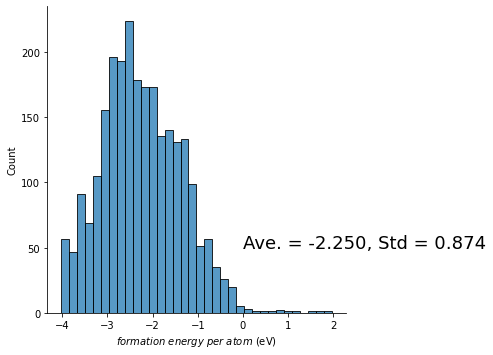

In [15]:
## Q1.6
# (a) formation energies per atom
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.displot(df, x='formation_energy_per_atom')
energy_mean = df['formation_energy_per_atom'].mean()
energy_std = df['formation_energy_per_atom'].std()
plt.xlabel(r"$formation$ $energy$ $per$ $atom$ (eV)")
plt.annotate(r"Ave. = %.3f, Std = %.3f" % (energy_mean, energy_std), (0, 50), fontsize=18)

Text(1, 400, 'Ave. = 1.229, Std = 1.594')

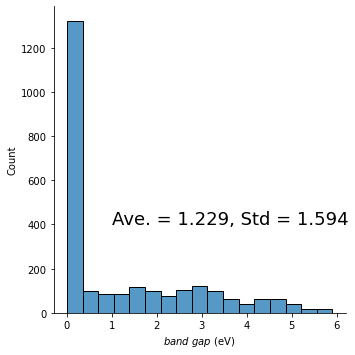

In [16]:
# (b) band gaps
sns.displot(df, x='band_gap')
bg_mean = df['band_gap'].mean()
bg_std = df['band_gap'].std()
plt.xlabel(r"$band$ $gap$ (eV)")
plt.annotate(r"Ave. = %.3f, Std = %.3f" % (bg_mean, bg_std), (1, 400), fontsize=18)

In [17]:
## Q2
# Import data
from io import StringIO
import requests
url = "https://ndownloader.figshare.com/files/9158587"
raw = requests.get(url).text
dataQ2 = pd.read_csv(StringIO(raw))

## Q2.1
# Parse into pandas dataframe
dfQ2 = pd.DataFrame(dataQ2)
dfQ2

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [18]:
## Q2.2
# Count total rows
r = dfQ2['A'].count()
print("There is {} compounds".format(r))

# Or this also shows, 5329 rows
dfQ2.count()

There is 5329 compounds


Chemical formula              5329
A                             5329
B                             5329
In literature                 5329
Valence A                     5329
Valence B                     5329
Radius A [ang]                5329
Radius B [ang]                5329
Lowest distortion             5329
Formation energy [eV/atom]    5329
Stability [eV/atom]           5329
Magnetic moment [mu_B]        5329
Volume per atom [A^3/atom]    5329
Band gap [eV]                 5329
a [ang]                       5329
b [ang]                       5329
c [ang]                       5329
alpha [deg]                   5329
beta [deg]                    5329
gamma [deg]                   5329
Vacancy energy [eV/O atom]    5329
dtype: int64

In [19]:
## Q2.3
# Number of total columns
len(dfQ2.columns)

21

In [20]:
# Or
dfQ2.shape[1]

21

In [21]:
# Or
dfQ2.head()

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807


In [22]:
## Q2.3
# Column names
for col in dfQ2.columns:
    print(col)

Chemical formula
A
B
In literature
Valence A
Valence B
Radius A [ang]
Radius B [ang]
Lowest distortion
Formation energy [eV/atom]
Stability [eV/atom]
Magnetic moment [mu_B]
Volume per atom [A^3/atom]
Band gap [eV]
a [ang]
b [ang]
c [ang]
alpha [deg]
beta [deg]
gamma [deg]
Vacancy energy [eV/O atom]


In [23]:
# Or
list(dfQ2.columns)

['Chemical formula',
 'A',
 'B',
 'In literature',
 'Valence A',
 'Valence B',
 'Radius A [ang]',
 'Radius B [ang]',
 'Lowest distortion',
 'Formation energy [eV/atom]',
 'Stability [eV/atom]',
 'Magnetic moment [mu_B]',
 'Volume per atom [A^3/atom]',
 'Band gap [eV]',
 'a [ang]',
 'b [ang]',
 'c [ang]',
 'alpha [deg]',
 'beta [deg]',
 'gamma [deg]',
 'Vacancy energy [eV/O atom]']

In [24]:
# Or
sorted(dfQ2)

['A',
 'B',
 'Band gap [eV]',
 'Chemical formula',
 'Formation energy [eV/atom]',
 'In literature',
 'Lowest distortion',
 'Magnetic moment [mu_B]',
 'Radius A [ang]',
 'Radius B [ang]',
 'Stability [eV/atom]',
 'Vacancy energy [eV/O atom]',
 'Valence A',
 'Valence B',
 'Volume per atom [A^3/atom]',
 'a [ang]',
 'alpha [deg]',
 'b [ang]',
 'beta [deg]',
 'c [ang]',
 'gamma [deg]']

In [25]:
## Q2.4
# Remove "-"
# Drop "-" in formation energy
dfQ2['Formation energy [eV/atom]'].replace('-', np.nan).dropna()
# Drop all "-" in the file
dfQ2_2 = dfQ2.replace('-', np.nan).dropna()
dfQ2_2

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [26]:
# Check data types, formation energy is in object
dfQ2_2.dtypes
# Or
dfQ2_2['Formation energy [eV/atom]'].dtypes
# Or
dfQ2_2['Formation energy [eV/atom]'].map(type)

# Turn into float
dfQ2_2['Formation energy [eV/atom]'] = dfQ2_2['Formation energy [eV/atom]'].astype(float)
dfQ2_2.dtypes

Chemical formula               object
A                              object
B                              object
In literature                    bool
Valence A                      object
Valence B                      object
Radius A [ang]                float64
Radius B [ang]                float64
Lowest distortion              object
Formation energy [eV/atom]    float64
Stability [eV/atom]            object
Magnetic moment [mu_B]         object
Volume per atom [A^3/atom]     object
Band gap [eV]                  object
a [ang]                        object
b [ang]                        object
c [ang]                        object
alpha [deg]                    object
beta [deg]                     object
gamma [deg]                    object
Vacancy energy [eV/O atom]     object
dtype: object

In [27]:
# Remove A=B
dfQ2_3 = dfQ2_2[dfQ2_2['A'] != dfQ2_2['B']]
dfQ2_3

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
5,AcBO3,Ac,B,False,element not in BV,element not in BV,1.12,0.27,cubic,-2.316,...,0.000,10.075,1.071,3.693,3.693,3.693,90.0,90.0,90.0,4.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,ZrVO3,Zr,V,False,1,5,0.89,0.54,cubic,-2.208,...,0.543,11.093,0.000,3.814,3.814,3.814,90.0,90.0,90.0,2.395
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177


In [28]:
row_remains = len(pd.unique(dfQ2_3['Chemical formula']))
print("There remains", row_remains, "rows of data points")

There remains 3931 rows of data points


Text(1, 200, 'Ave. = -1.838, Std = 0.933')

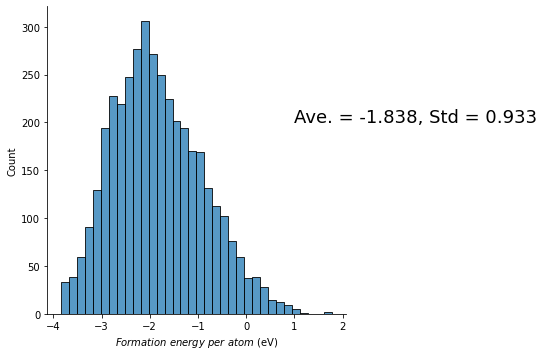

In [29]:
## Q2.5
# distribution of the formation energies per atom
sns.displot(dfQ2_3, x='Formation energy [eV/atom]')
forE_mean = dfQ2_3['Formation energy [eV/atom]'].mean()
forE_std = dfQ2_3['Formation energy [eV/atom]'].std()
plt.xlabel(r"$Formation$ $energy$ $per$ $atom$ (eV)")
plt.annotate(r"Ave. = %.3f, Std = %.3f" % (forE_mean, forE_std), (1, 200), fontsize=18)

In [30]:
## Q3
# Number of unique formulas in MP is 1326
dfQ1_1 = df.drop_duplicates(['pretty_formula'])
len(dfQ1_1)

1326

In [31]:
# Number of unique formulas in OQMD is 3931
row_remains

3931

In [32]:
# Number of overlay between MP & OQMD
df_merged = pd.merge(left = dfQ1_1, right = dfQ2_3, how='inner', left_on='pretty_formula', right_on='Chemical formula')
df_merged[['pretty_formula', 'Chemical formula']]

,pretty_formula,Chemical formula
0,CaFeO3,CaFeO3
1,CdIrO3,CdIrO3
2,CaRhO3,CaRhO3
3,CaRuO3,CaRuO3
4,CdRuO3,CdRuO3
...,...,...
835,ZnWO3,ZnWO3
836,ZrZnO3,ZrZnO3
837,ZrSiO3,ZrSiO3
838,ZrTlO3,ZrTlO3


In [33]:
print("There are", len(df_merged), "overlay rows")

There are 840 overlay rows


In [34]:
# Total number of formulas in both 
total_formulas = row_remains + len(dfQ1_1) - len(df_merged)
total_formulas

4417

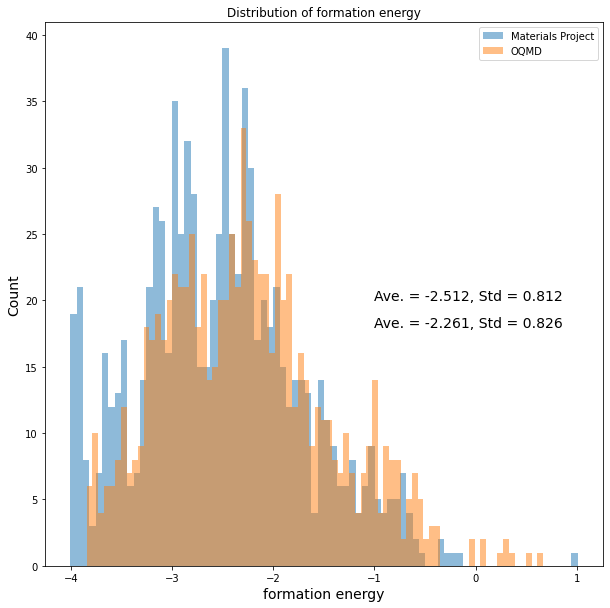

In [35]:
## Q3.2
plt.figure(figsize=(10,10))
plt.hist(df_merged["formation_energy_per_atom"], bins = 80, alpha=0.5, label="Materials Project")
plt.hist(df_merged["Formation energy [eV/atom]"], bins = 80, alpha=0.5, label="OQMD")
plt.xlabel("formation energy", size=14)
plt.ylabel("Count", size=14)
energy1_mean = df_merged["formation_energy_per_atom"].mean()
energy1_std = df_merged["formation_energy_per_atom"].std()
energy2_mean = df_merged["Formation energy [eV/atom]"].mean()
energy2_std = df_merged["Formation energy [eV/atom]"].std()
plt.title("Distribution of formation energy")
plt.annotate(r"Ave. = %.3f, Std = %.3f" % (energy1_mean, energy1_std), (-1, 20), fontsize=14)
plt.annotate(r"Ave. = %.3f, Std = %.3f" % (energy2_mean, energy2_std), (-1, 18), fontsize=14)
plt.legend(loc='upper right')

In [36]:
## Q3.3
from scipy import stats
stats.ttest_ind(df_merged["formation_energy_per_atom"], df_merged["Formation energy [eV/atom]"])
# Null hypothesis is that the two data are not different
# We get p-value < 0.5, so the result is significant, we drop null hypothesis, so the two data sets are different
# Difference over here might because of
# 1. We remove some duplicate formula data in MP
# 2. The formation energy might be calculated by different methods or sources of experiments for the same compound
# 3. The same compounds in the subset are only categorized by the chemical formula, there might have other differences, for example atoms structures, sizes or valences

Ttest_indResult(statistic=-6.258709349325242, pvalue=4.917565497414063e-10)

In [37]:
## Q3.2
# If do not remove duplicate formula in MP 
# There will be 1513 rows of data from MP
# Might have multiple formation energies per atom for one chemical formula in different rows
# (OQMD) only have one formation energy for one chemical formula → 840 rows, same as above
df_merged_2 = pd.merge(left = df, right = dfQ2_3, how='inner', left_on='pretty_formula', right_on='Chemical formula')
df_merged_2

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,formation_energy (J/mol),e_cat,bg_cat,...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,mp-1001571,CaFeO3,5,0.0000,-2.176374,[],0.052147,-210020.122942,unstable,Metallic,...,0.800,10.664,0.000,5.287,5.287,5.287,60.9,60.9,60.9,1.132
1,mp-1275341,CaFeO3,20,0.0607,-2.223901,"[248484, 92345]",0.004620,-214606.462471,potentially stable,small bandgap,...,0.800,10.664,0.000,5.287,5.287,5.287,60.9,60.9,60.9,1.132
2,mp-1278982,CaFeO3,20,0.0000,-2.175631,[],0.052891,-209948.378086,unstable,Metallic,...,0.800,10.664,0.000,5.287,5.287,5.287,60.9,60.9,60.9,1.132
3,mp-19115,CaFeO3,20,0.0000,-2.228522,"[92330, 92349, 92352, 92339, 92350, 92348, 923...",0.000000,-215052.332711,potentially stable,Metallic,...,0.800,10.664,0.000,5.287,5.287,5.287,60.9,60.9,60.9,1.132
4,mp-1016828,CdIrO3,5,0.0000,-0.839223,[],0.463198,-80984.987365,unstable,Metallic,...,0.169,11.421,0.000,5.417,5.443,7.747,90.0,90.0,90.0,1.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,mvc-5731,ZnWO3,5,0.0000,-1.457039,[],0.481185,-140604.259158,unstable,Metallic,...,0.003,10.608,0.000,5.180,5.180,5.180,63.6,63.6,63.6,4.632
1509,mp-1016883,ZrZnO3,5,0.0000,-2.246558,[],0.757970,-216792.866975,unstable,Metallic,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762
1510,mp-1183043,ZrSiO3,5,0.0000,-2.219990,[],1.072677,-214229.068678,unstable,Metallic,...,0.247,9.550,0.000,3.628,3.628,3.628,90.0,90.0,90.0,2.891
1511,mp-1183044,ZrTlO3,5,0.0000,-2.456059,[],0.234880,-237009.697714,unstable,Metallic,...,0.001,14.796,0.000,6.066,6.094,8.007,90.0,90.0,90.0,-2.018


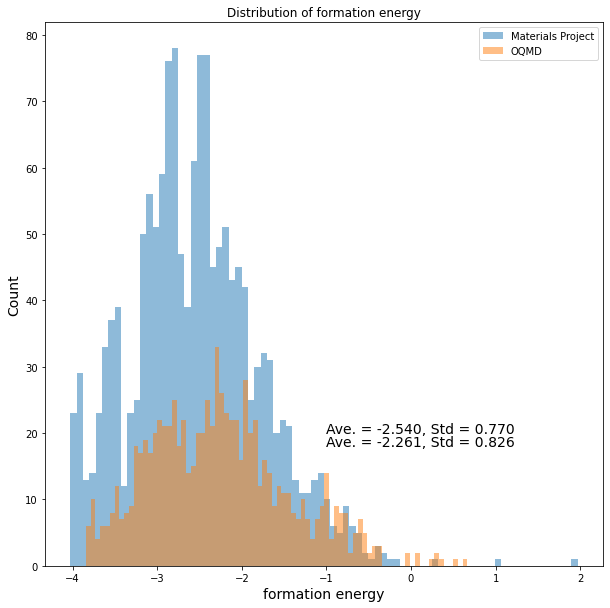

In [38]:
plt.figure(figsize=(10,10))
plt.hist(df_merged_2["formation_energy_per_atom"], bins = 80, alpha=0.5, label="Materials Project")
plt.hist(df_merged["Formation energy [eV/atom]"], bins = 80, alpha=0.5, label="OQMD")
plt.xlabel("formation energy", size=14)
plt.ylabel("Count", size=14)
energy1_mean2 = df_merged_2["formation_energy_per_atom"].mean()
energy1_std2 = df_merged_2["formation_energy_per_atom"].std()
energy2_mean = df_merged["Formation energy [eV/atom]"].mean()
energy2_std = df_merged["Formation energy [eV/atom]"].std()
plt.title("Distribution of formation energy")
plt.annotate(r"Ave. = %.3f, Std = %.3f" % (energy1_mean2, energy1_std2), (-1, 20), fontsize=14)
plt.annotate(r"Ave. = %.3f, Std = %.3f" % (energy2_mean, energy2_std), (-1, 18), fontsize=14)
plt.legend(loc='upper right')

In [39]:
## Q3.3
stats.ttest_ind(df_merged_2["formation_energy_per_atom"], df_merged["Formation energy [eV/atom]"])
# The data are not in the same size, thus having different significance

Ttest_indResult(statistic=-8.18520645589719, pvalue=4.403611448530274e-16)